In [1]:
from cv2 import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

print(cv.__version__)

4.1.2


#### opencv read image from local

(460, 460, 3)


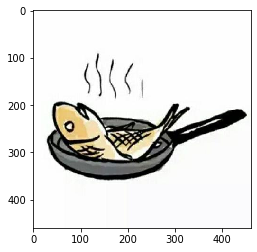

In [2]:
fish = cv.imread('fish.jpeg')
# BGR -> RGB
fish = cv.cvtColor(fish, cv.COLOR_BGR2RGB)
plt.imshow(fish)
print(fish.shape)

In [3]:
#### 读取为灰度图,灰度图为单通道，但是有0～255色阶，所以不是黑白的

(460, 460, 3)


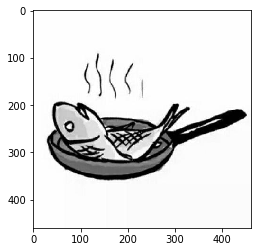

In [4]:
gray_fish = cv.imread('fish.jpeg', cv.IMREAD_GRAYSCALE)
gray_fish = cv.cvtColor(gray_fish, cv.COLOR_BGR2RGB)
plt.imshow(gray_fish)
print(gray_fish.shape)

(460, 460, 3)


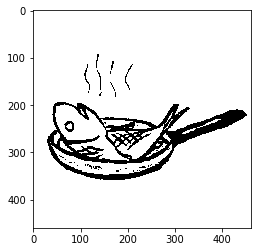

In [5]:
ret, black_fish = cv.threshold(gray_fish, 100, 255, cv.THRESH_BINARY)
black_fish = cv.cvtColor(black_fish, cv.COLOR_BGR2RGB)
plt.imshow(black_fish)
print(black_fish.shape)